##Transfer Learning InceptionV3 using Keras

In [1]:
# import the libraries as shown below
import keras,cv2
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

import tensorflow as tf

from keras.models import load_model


from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

#from tensorflow.keras.applications.resnet50 import ResNet50
from keras import metrics
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:


train_path = '/content/drive/MyDrive/Dataset/chest_xray/train'
valid_path = '/content/drive/MyDrive/Dataset/chest_xray/test'


In [5]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of InceptionV3
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87924736/87910968 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/chest_xray/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
#prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',   
  optimizer='adam',
  metrics=['accuracy']
)
  #    categorical_crossentropy',

In [12]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

In [13]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5302 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 654 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set) 
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
166/166 [==============================] - 1433s 8s/step - loss: 0.4939 - accuracy: 0.9059 - val_loss: 0.5961 - val_accuracy: 0.8761
Epoch 2/10
166/166 [==============================] - 722s 4s/step - loss: 0.4091 - accuracy: 0.9170 - val_loss: 2.1027 - val_accuracy: 0.7951
Epoch 3/10
166/166 [==============================] - 724s 4s/step - loss: 0.2724 - accuracy: 0.9464 - val_loss: 0.8126 - val_accuracy: 0.8746
Epoch 4/10
166/166 [==============================] - 723s 4s/step - loss: 0.2655 - accuracy: 0.9462 - val_loss: 3.7586 - val_accuracy: 0.7003
Epoch 5/10
166/166 [==============================] - 717s 4s/step - loss: 0.3880 - accuracy: 0.9387 - val_loss: 1.6323 - val_accuracy: 0.8196
Epoch 6/10
166/166 [==============================] - 719s 4s/step - loss: 0.3109 - accuracy: 0.9491 - val_loss: 0.9371 - val_accuracy: 0.8869
Epoch 7/10
166/166 [==============================] - 717s 4s/step - loss: 0.2408 - accuracy: 0.9559 - val_loss: 1.3791 - val_accuracy: 0.844

In [17]:
model.evaluate_generator(training_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.31605151295661926, 0.9502074718475342]

In [18]:
model.evaluate_generator(test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[2.151441812515259, 0.8149847388267517]

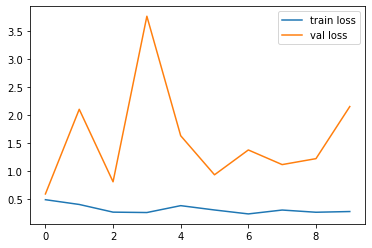

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


In [20]:
import os
y_actual=[]
y_test=[]

In [135]:
#training_set.class_indices

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [43]:
from re import I
from PIL.Image import NORMAL
test_data=[]
test_labels=[]
for i in ['/NORMAL/', '/PNEUMONIA/']:
    for img in (os.listdir('/content/drive/MyDrive/Dataset/chest_xray/test/' +i)):
        img=plt.imread('/content/drive/MyDrive/Dataset/chest_xray/test/'+ i+img)
        img= cv2.resize(img, (224,224))
        img= np.dstack([img, img,img])
        img=img.astype('float32')/ 255
        if i=='/NORMAL/':
          label=0
        elif i=='/PNEUMONIA/':
          label=1
        test_data.append(img)
        test_labels.append(label)

 
    


    

In [44]:
test_data=np.array(test_data)
test_labels=np.array(test_labels)

In [55]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
preds= model.predict(test_data)
acc= accuracy_score(test_labels,np.round(preds))*100
cm=confusion_matrix(test_labels,np.round(preds))
tn,fp,fn,tp= cm.ravel()
print("confusion_matrix===========")
print(cm)
print("\ntest_matrix==============")
precision=tp/(tp+fp)
recall=tp/(tp+fn)
sensitivity=tn/(tn+fp)
print('accuracy: {}%'.format(acc))
print('precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-scor: {}%'.format(2*precision*recall/(precision+recall)))

print('\n train matrix===========')
print('train acc:{}'.format(np.round((r.history['accuracy'][-1])*100,2)))

confusion_matrix===========
[[120 122]
 [  5 407]]

test_matrix==============
accuracy: 80.58103975535168%
precision: 0.7693761814744802%
Recall: 0.9878640776699029%
F1-scor: 0.8650371944739638%

 train matrix===========
train acc:95.34


In [56]:
print(classification_report(test_labels,np.round(preds),target_names=['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.96      0.50      0.65       242
   Pneumonia       0.77      0.99      0.87       412

    accuracy                           0.81       654
   macro avg       0.86      0.74      0.76       654
weighted avg       0.84      0.81      0.79       654



<Figure size 432x288 with 0 Axes>

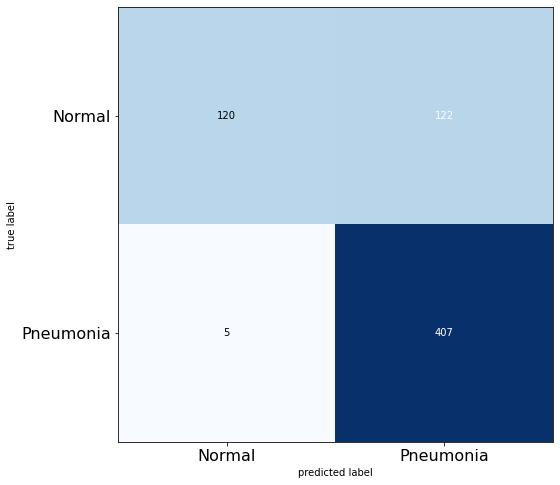

In [57]:
from mlxtend.plotting import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8),hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2),['Normal','Pneumonia'],fontsize=16)
plt.yticks(range(2),['Normal','Pneumonia'],fontsize=16)
plt.show()

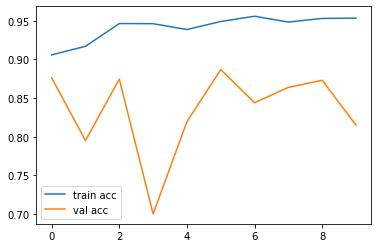

<Figure size 432x288 with 0 Axes>

In [58]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [123]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [28]:
# save it as a h5 file
model.save('model_inception.h5')

In [127]:
model=load_model('model_inception.h5')

In [128]:
img=image.load_img('/content/drive/MyDrive/Dataset/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg',target_size=(224,224))


In [129]:
x=image.img_to_array(img)

In [130]:
x=np.expand_dims(x, axis=0)

In [131]:
img_data=preprocess_input(x)

In [132]:
classes=model.predict(img_data)

In [133]:
result=int(classes[0][0])

In [134]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal
